In [42]:
from __future__ import division

%matplotlib inline
import numpy as np
import pandas as pd
import thinkdsp
import thinkplot

In [43]:
df = pd.read_csv('data/WISDM_ar_v1.1_raw.txt')
df.head()

,personID,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [49]:
for g, _ in df.groupby('personID'):
    print g

17
20
33


In [62]:
dbname = ''
db = ''

for i, (g, gdf) in enumerate(df.groupby('personID')):
    # only work with the data for the personID 33
    if g==20:
        dbname, db = g, gdf
        break

In [63]:
print "PERSON {}".format(dbname)
print db.head()

PERSON 20
       personID activity          time     x      y         z
14353        20  Walking  324212291000  5.41  13.21 -4.630918
14354        20  Walking  324262248000  6.74   8.16  0.953424
14355        20  Walking  324312297000  5.33   5.37 -2.792171
14356        20  Walking  324362254000  3.38   8.54 -1.525479
14357        20  Walking  324412212000  1.73   9.11 -0.994285


In [64]:
db.time

14353    324212291000
14354    324262248000
14355    324312297000
14356    324362254000
14357    324412212000
14358    324462321000
14359    324512248000
14360    324562297000
14361    324612254000
14362    324662303000
14363    324712230000
14364    324762279000
14365    324812205000
14366    324862285000
14367    324912242000
...
49937    2901622203000
49938    2901672313000
49939    2901722209000
49940    2901772288000
49941    2901822246000
49942    2901872295000
49943    2901922221000
49944    2901972301000
49945    2902022197000
49946    2902072276000
49947    2902122233000
49948    2902172313000
49949    2902222240000
49950    2902272288000
49951    2902322246000
Name: time, Length: 35599, dtype: int64

In [65]:
def evenly_sample_ts(ts):
    return np.linspace(ts.min(), ts.max(), len(ts))

###Visualize X

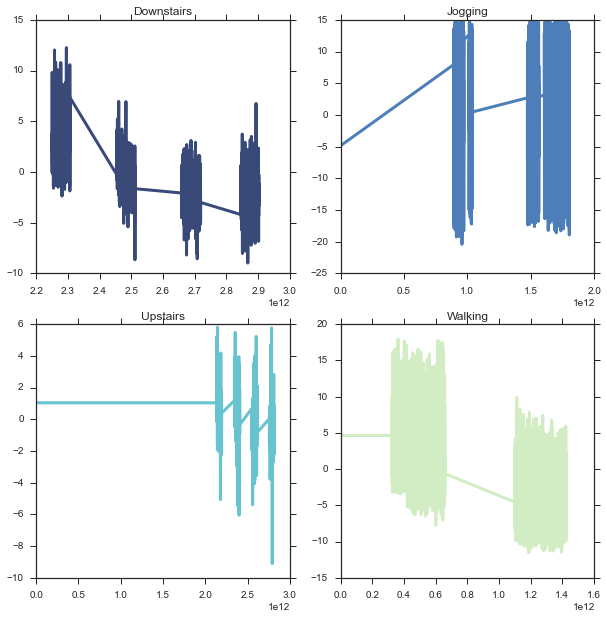

In [85]:
thinkplot.preplot(4, 2, 2)

for plotnum, (g, gdb) in enumerate(db.groupby('activity')):
    
    time = gdb.time.values
    vals = gdb.x.values
    vals -= vals.mean()
    evenly_sampled_ts = evenly_sample_ts(time)
    interp_vals = np.interp(evenly_sampled_ts, time, vals) 
    
    thinkplot.subplot(plotnum+1)
    thinkplot.plot(evenly_sampled_ts, interp_vals)
    thinkplot.config(title=g)
    

###Visualize Y

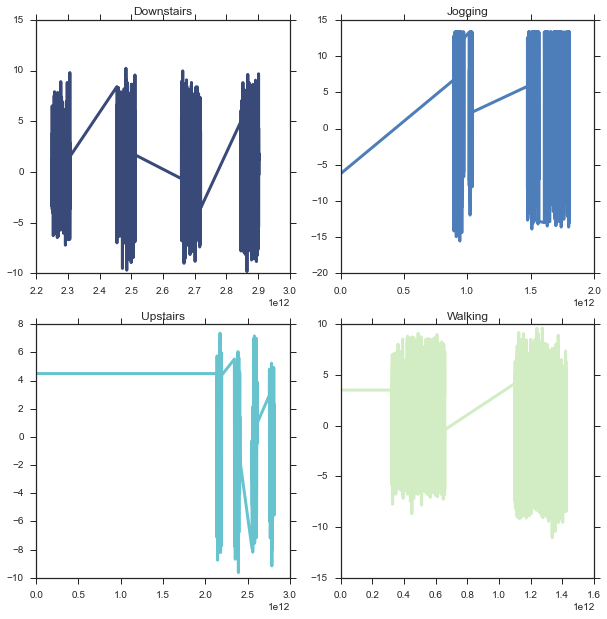

In [72]:
thinkplot.preplot(4, 2, 2)

for plotnum, (g, gdb) in enumerate(db.groupby('activity')):
    
    time = gdb.time.values
    vals = gdb.y.values
    vals -= vals.mean()
    evenly_sampled_ts = evenly_sample_ts(time)
    interp_vals = np.interp(evenly_sampled_ts, time, vals) 
    
    thinkplot.subplot(plotnum+1)
    thinkplot.plot(evenly_sampled_ts, interp_vals)
    thinkplot.config(title=g)
    

###Visualize Z

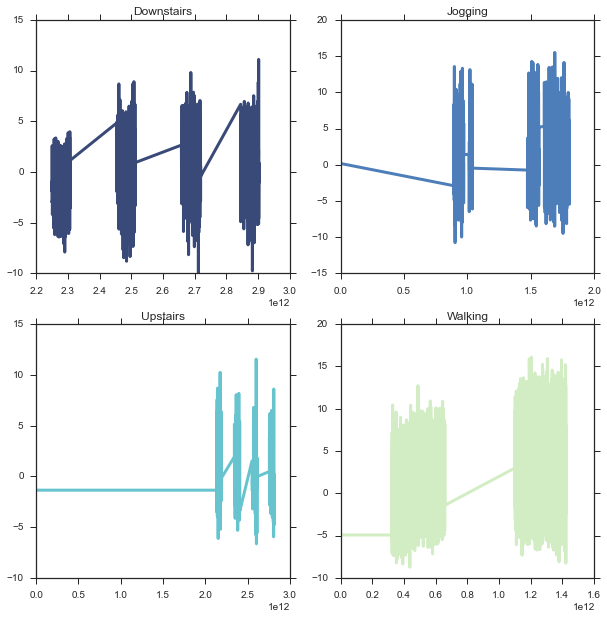

In [73]:
thinkplot.preplot(4, 2, 2)

for plotnum, (g, gdb) in enumerate(db.groupby('activity')):
    
    time = gdb.time.values
    vals = gdb.z.values
    vals -= vals.mean()
    evenly_sampled_ts = evenly_sample_ts(time)
    interp_vals = np.interp(evenly_sampled_ts, time, vals) 
    
    thinkplot.subplot(plotnum+1)
    thinkplot.plot(evenly_sampled_ts, interp_vals)
    thinkplot.config(title=g)
    

###Visualize Accleration Magnitude

In [77]:
def magnitude_vector(xyz_matrix, 

array([[  5.41      ,  13.21      ,  -4.93717049],
       [  6.74      ,   8.16      ,   0.64717184],
       [  5.33      ,   5.37      ,  -3.09842369],
       ..., 
       [ -1.84      ,   7.44      ,  -0.19728971],
       [  0.76      ,  10.08      ,   4.06587951],
       [  0.46      ,  10.38      ,   0.61993115]])

In [78]:
np.linalg.norm(gdb[["x","y","z"]].values, axis=1)

1.7320508075688772

In [84]:
np.linalg.norm(np.ones((10,3)), axis=1)

array([ 1.73205081,  1.73205081,  1.73205081,  1.73205081,  1.73205081,
        1.73205081,  1.73205081,  1.73205081,  1.73205081,  1.73205081])

In [79]:
np.linalg.norm([1,1,1])

1.7320508075688772

In [86]:
def magnitude(xyz):
    """Calculates the magnitude of the accleration vectors
    
    Arguments
    ---------
    xyz: shape (n_samples, 3)
        matrix with the row as the sample, and the columns as x, y, z
        
    Returns
    -------
    magnitude: shape (n_samples,)
        array of the magnitude of each xyz accelerometer sample
    """
    return np.linalg.norm(xyz, axis=1)

In [ ]:
thinkplot.preplot(4, 2, 2)

for plotnum, (g, gdb) in enumerate(db.groupby('activity')):
    
    time = gdb.time.values
    vals = gdb.z.values
    vals -= vals.mean()
    evenly_sampled_ts = evenly_sample_ts(time)
    interp_vals = np.interp(evenly_sampled_ts, time, vals) 
    
    thinkplot.subplot(plotnum+1)
    thinkplot.plot(evenly_sampled_ts, interp_vals)
    thinkplot.config(title=g)
    

### Visualize Wave for a Segment

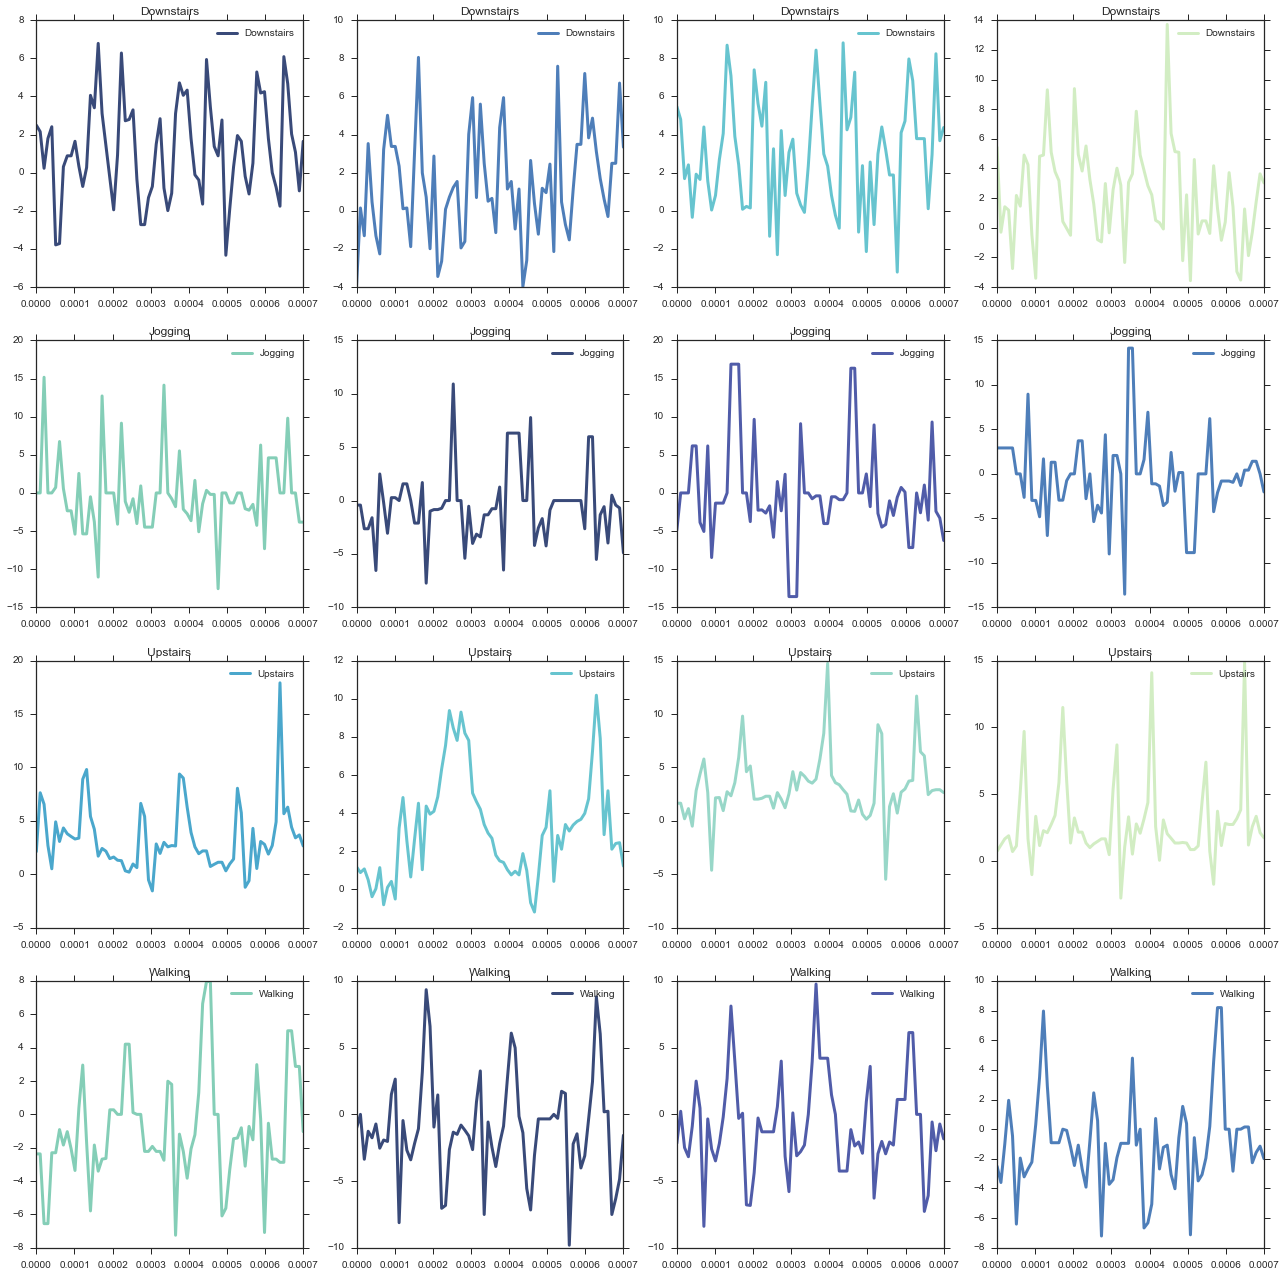

In [69]:
# Get ready to plot 2 subplots as a 4x2 grid, where a subplot is a set of activities
thinkplot.preplot(4, 4, 4)

# Visualize the 4 activities
for plotnum, (g, gdb) in enumerate(db.groupby('activity')):
    # Calculate Waves
    # FIX: framerate is probably not calculated correctly
    zwave = thinkdsp.Wave(gdb['z'].values, framerate=100000)
    
    start0 = 0.01
    window_size = 0.0007
    seg_nums = 4
    
    for i in range(seg_nums):
        zseg = zwave.segment(start=start0+i*window_size, duration=window_size)
        thinkplot.subplot(4*plotnum+1+i)
        zseg.plot(label=g)
        thinkplot.Config(title=g)

### Visualize Spectrums for a Segment

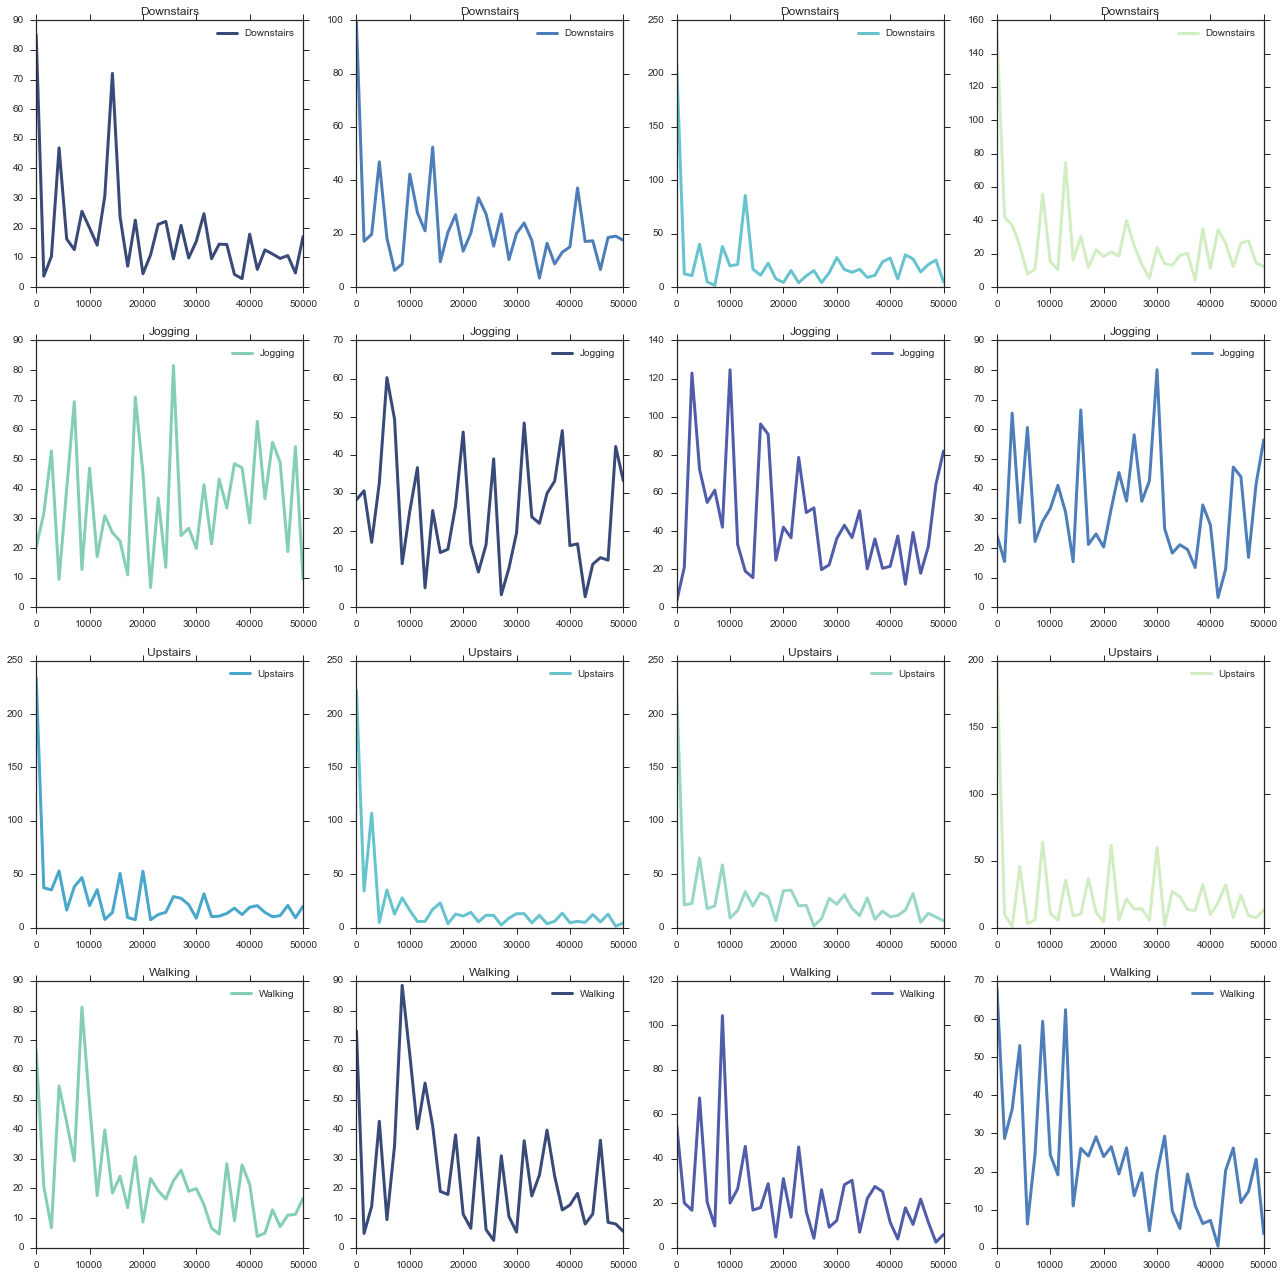

In [70]:
# Get ready to plot 2 subplots as a 4x2 grid
thinkplot.preplot(4, 4, 4)

# Visualize the 4 activities
for plotnum, (g, gdb) in enumerate(db.groupby('activity')):
    # Calculate Waves
    # FIX: framerate is probably not calculated correctly
    zwave = thinkdsp.Wave(gdb['z'].values, framerate=100000)
    
    start0 = 0.01
    window_size = 0.0007
    seg_nums = 4
    
    for i in range(seg_nums):
        zseg = zwave.segment(start=start0+i*window_size, duration=window_size)
        spectrum = zseg.make_spectrum()
        thinkplot.subplot(4*plotnum+1+i)
        spectrum.plot(label=g)
        thinkplot.Config(title=g)

Above are spectrums of the four activities at four consecutive windows. For going up and down the stairs, the spectrums across the four windows are relatively similar. However, walking and jogging have some discrepancies, possibly due to the fact that the time increments are not consistent.

### Plot Power for Segments

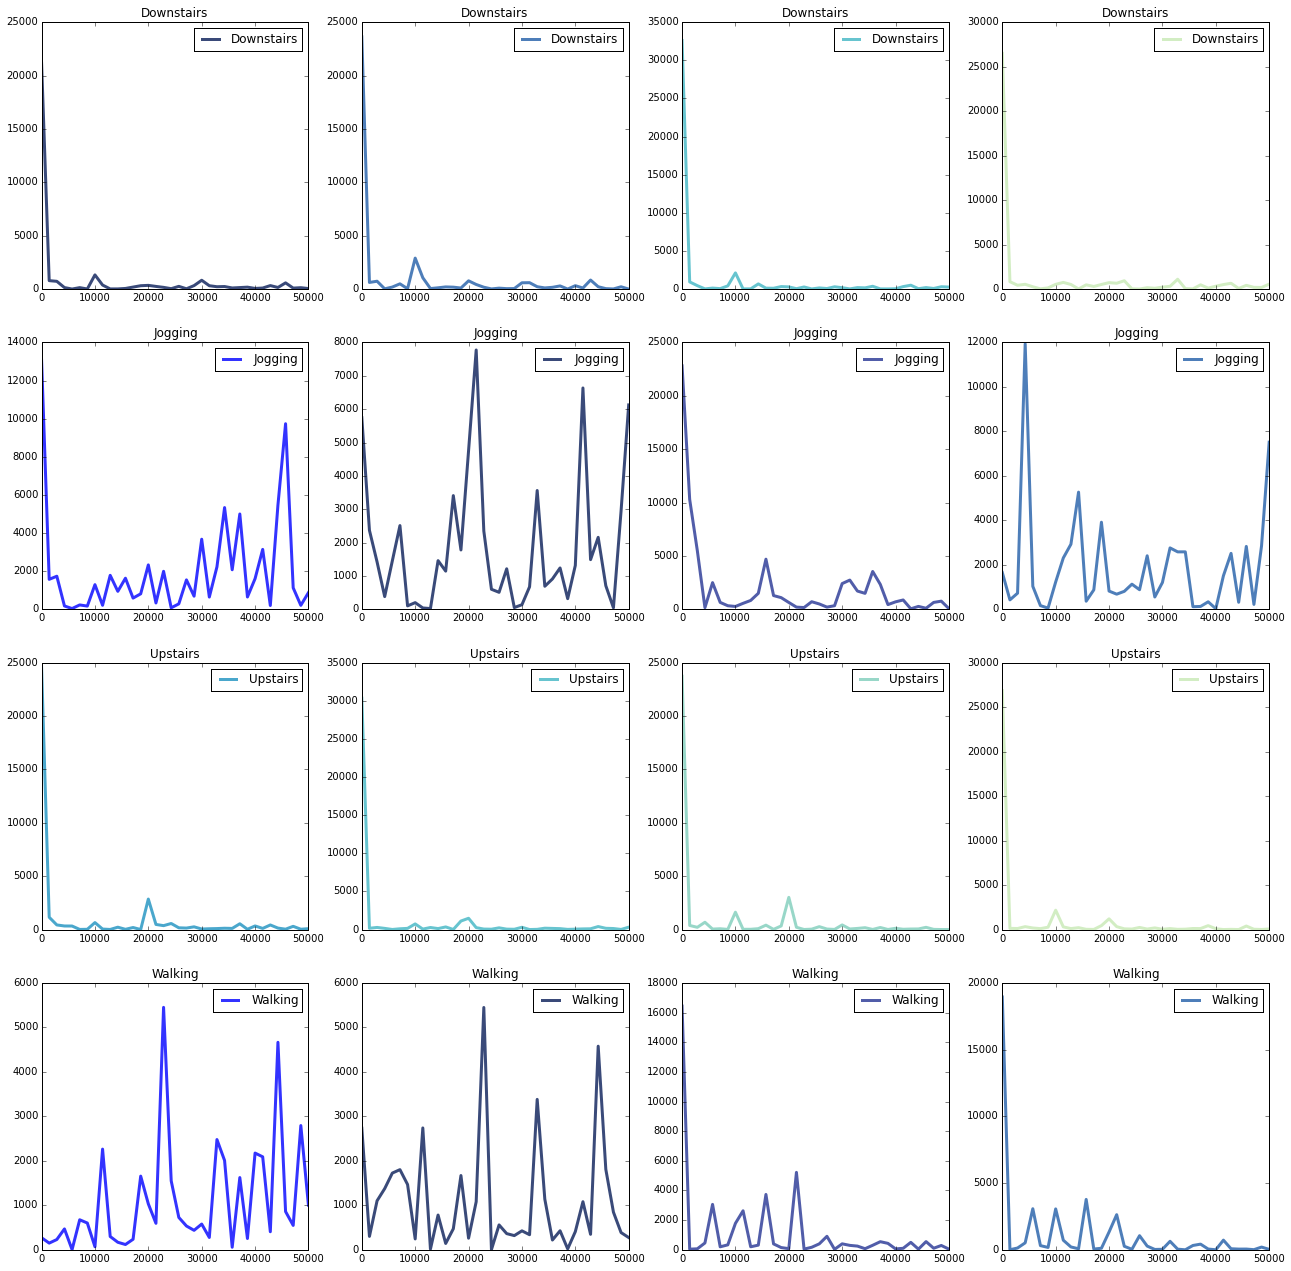

In [9]:
# Get ready to plot 2 subplots as a 4x2 grid
thinkplot.preplot(4, 4, 4)

# Visualize the 4 activities
for plotnum, (g, gdb) in enumerate(db.groupby('activity')):
    # Calculate Waves
    # FIX: framerate is probably not calculated correctly
    zwave = thinkdsp.Wave(gdb['z'].values, framerate=100000)
    
    start0 = 0.01
    window_size = 0.0007
    seg_nums = 4
    
    for i in range(seg_nums):
        zseg = zwave.segment(start=start0+i*window_size, duration=window_size)
        spectrum = zseg.make_spectrum()
        thinkplot.subplot(4*plotnum+1+i)
        spectrum.plot_power(label=g)
        thinkplot.Config(title=g)

### Plot Phases for Segments

c:\Users\mmccauley\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


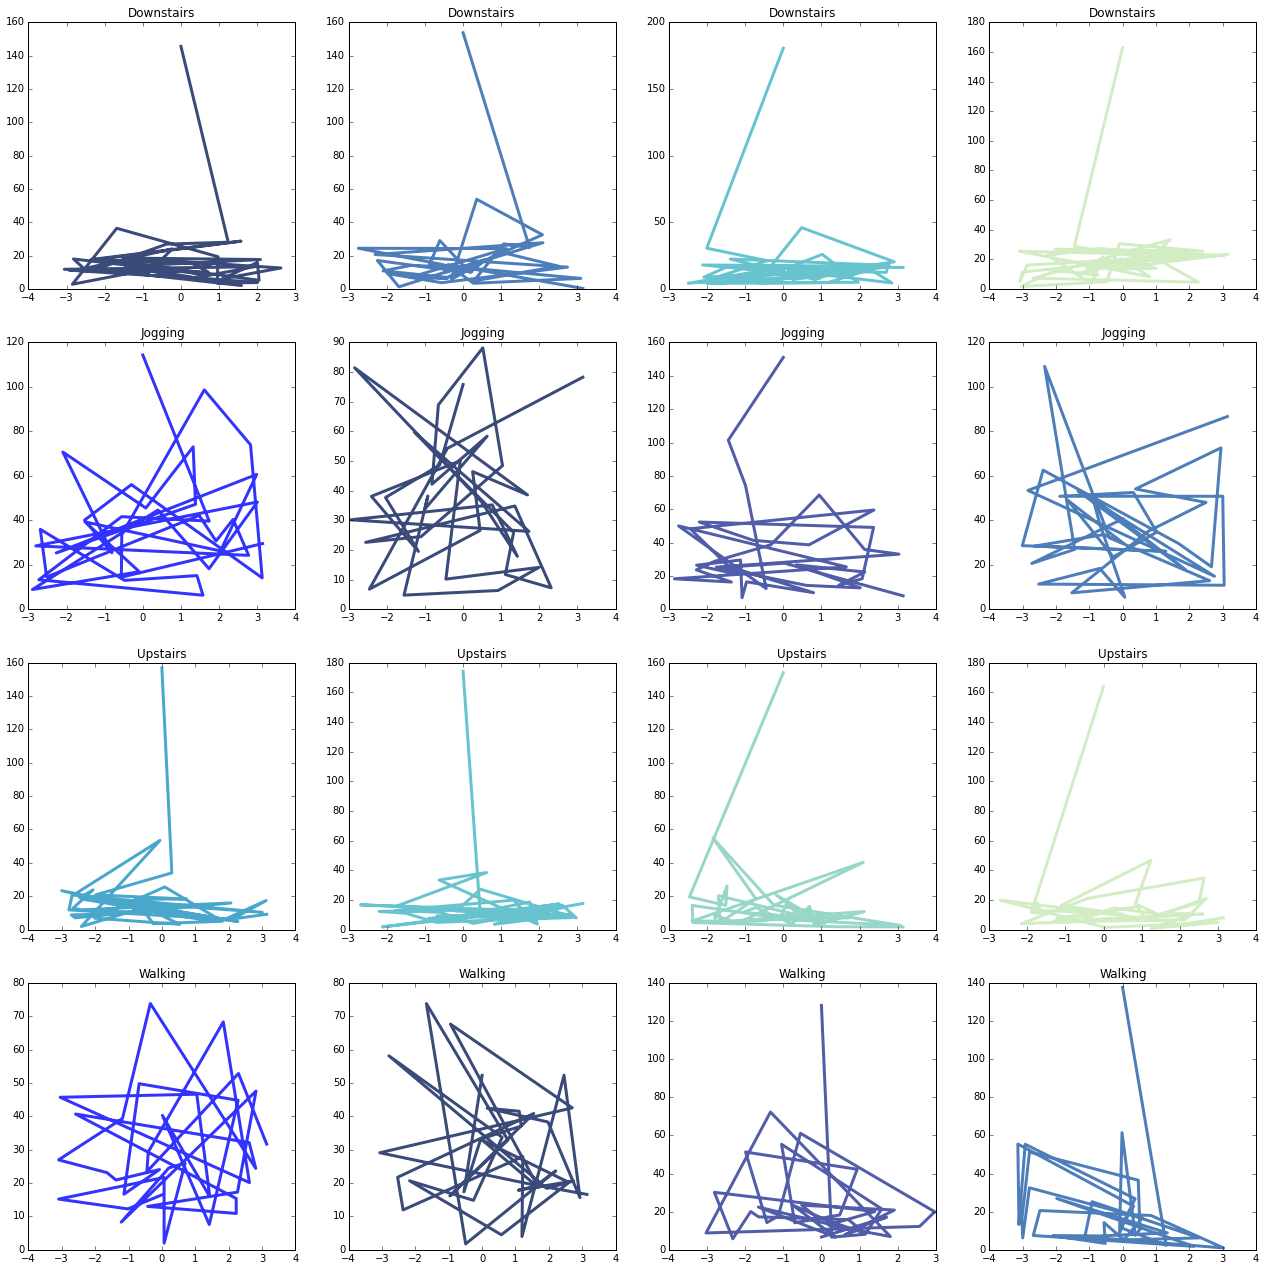

In [10]:
# Get ready to plot 2 subplots as a 4x2 grid
thinkplot.preplot(4, 4, 4)

# Visualize the 4 activities
for plotnum, (g, gdb) in enumerate(db.groupby('activity')):
    # Calculate Waves
    # FIX: framerate is probably not calculated correctly
    zwave = thinkdsp.Wave(gdb['z'].values, framerate=100000)
    
    start0 = 0.01
    window_size = 0.0007
    seg_nums = 4
    
    for i in range(seg_nums):
        zseg = zwave.segment(start=start0+i*window_size, duration=window_size)
        spectrum = zseg.make_spectrum()
        thinkplot.subplot(4*plotnum+1+i)
        thinkplot.plot(spectrum.angles(), spectrum.amps)
        thinkplot.Config(title=g)

##TODOS:

- phone accelerometer
- timeseries spacing
- feature visualization / extraction
    - phase (WIP)
    - frequency bins
    - n most dominant frequencies
- machine learning pipeline building
    - Hidden Markov Model
    
##DONE:

- feature visualization / extraction
    - timeseries
    - frequency spectrum
    - power spectrum